# Importing libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('Nykaa_BestSkinProducts.csv')
df.head()

,Unnamed: 0,Product Name,Reviews,Original Price,Offer Price,Discount,Free Gifts
0,0,L'Oreal Paris Glycolic Bright Serum With Glyco...,( 5154 ),MRP:₹749,₹486,35% Off,NaN
1,1,Nykaa Skin Secrets Gold Sheet Mask + Nykaa Ski...,( 25 ),MRP:₹1099,₹879,20% Off,Enjoy Free Gift
2,2,Dot & Key Vitamin C + E Face Sunscreen With SP...,( 3678 ),MRP:₹495,₹421,15% Off,Extra 5% Off
3,3,Olay Total Effects 7 In One Anti-Ageing Day Cr...,( 6065 ),MRP:₹798,₹638,20% Off,NaN
4,4,Nykaa SKINRX 10% Vitamin C with 5% Niacinamide...,( 1427 ),MRP:₹699,₹594,15% Off,NaN


In [3]:
#Dataset information in rows and columns
df.shape

(12000, 7)

In [4]:
#Complete information of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Unnamed: 0      12000 non-null  int64 
 1   Product Name    12000 non-null  object
 2   Reviews         11035 non-null  object
 3   Original Price  12000 non-null  object
 4   Offer Price     12000 non-null  object
 5   Discount        9025 non-null   object
 6   Free Gifts      3998 non-null   object
dtypes: int64(1), object(6)
memory usage: 656.4+ KB


# DATA CLEANING

In [5]:
df.columns

Index(['Unnamed: 0', 'Product Name', 'Reviews', 'Original Price',
       'Offer Price', 'Discount', 'Free Gifts'],
      dtype='object')

In [6]:
#Dropping unwanted columns
df = df.drop('Unnamed: 0', axis=1)
df.head()

,Product Name,Reviews,Original Price,Offer Price,Discount,Free Gifts
0,L'Oreal Paris Glycolic Bright Serum With Glyco...,( 5154 ),MRP:₹749,₹486,35% Off,NaN
1,Nykaa Skin Secrets Gold Sheet Mask + Nykaa Ski...,( 25 ),MRP:₹1099,₹879,20% Off,Enjoy Free Gift
2,Dot & Key Vitamin C + E Face Sunscreen With SP...,( 3678 ),MRP:₹495,₹421,15% Off,Extra 5% Off
3,Olay Total Effects 7 In One Anti-Ageing Day Cr...,( 6065 ),MRP:₹798,₹638,20% Off,NaN
4,Nykaa SKINRX 10% Vitamin C with 5% Niacinamide...,( 1427 ),MRP:₹699,₹594,15% Off,NaN


In [7]:
#Cleaning Columns
df['Reviews'] = df.Reviews.str.replace('\(|\)', '', regex = True)
df['Original Price'] = df['Original Price'].str.replace('MRP:₹', '', regex = True)
df['Original Price'] = df['Original Price'].str.replace('MRP:', '', regex = True)
df['Offer Price'] = df['Offer Price'].str.replace('₹', '', regex=True)

In [8]:
df.head()

,Product Name,Reviews,Original Price,Offer Price,Discount,Free Gifts
0,L'Oreal Paris Glycolic Bright Serum With Glyco...,5154,749,486,35% Off,NaN
1,Nykaa Skin Secrets Gold Sheet Mask + Nykaa Ski...,25,1099,879,20% Off,Enjoy Free Gift
2,Dot & Key Vitamin C + E Face Sunscreen With SP...,3678,495,421,15% Off,Extra 5% Off
3,Olay Total Effects 7 In One Anti-Ageing Day Cr...,6065,798,638,20% Off,NaN
4,Nykaa SKINRX 10% Vitamin C with 5% Niacinamide...,1427,699,594,15% Off,NaN


In [9]:
#checking null values
df.isnull().sum()

Product Name         0
Reviews            965
Original Price       0
Offer Price          0
Discount          2975
Free Gifts        8002
dtype: int64

In [10]:
#Let's fill last two columns
df.Discount = df.Discount.fillna('0% Off')
df['Free Gifts'] = df['Free Gifts'].fillna('No Gift')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Product Name    12000 non-null  object
 1   Reviews         11035 non-null  object
 2   Original Price  12000 non-null  object
 3   Offer Price     12000 non-null  object
 4   Discount        12000 non-null  object
 5   Free Gifts      12000 non-null  object
dtypes: object(6)
memory usage: 562.6+ KB


In [11]:
#changing dtypes of several columns from object to numeric
df['Reviews'] = pd.to_numeric(df['Reviews'])
df['Original Price'] = pd.to_numeric(df['Original Price'])
df['Offer Price'] = pd.to_numeric(df['Offer Price'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Product Name    12000 non-null  object 
 1   Reviews         11035 non-null  float64
 2   Original Price  9046 non-null   float64
 3   Offer Price     12000 non-null  int64  
 4   Discount        12000 non-null  object 
 5   Free Gifts      12000 non-null  object 
dtypes: float64(2), int64(1), object(3)
memory usage: 562.6+ KB


In [12]:
#Now we can fill the missing values in Original Price with Offer Price
df['Original Price'] = df['Original Price'].fillna(df['Offer Price'])


#Filling missing values in Reviews column with 0
df.Reviews = df.Reviews.fillna(0)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Product Name    12000 non-null  object 
 1   Reviews         12000 non-null  float64
 2   Original Price  12000 non-null  float64
 3   Offer Price     12000 non-null  int64  
 4   Discount        12000 non-null  object 
 5   Free Gifts      12000 non-null  object 
dtypes: float64(2), int64(1), object(3)
memory usage: 562.6+ KB


In [13]:
#Checking null values after filling the data
df.isnull().sum()

Product Name      0
Reviews           0
Original Price    0
Offer Price       0
Discount          0
Free Gifts        0
dtype: int64

In [14]:
#Checking duplicate values
df.duplicated().sum()

2067

In [15]:
#Checking duplicates in a tabular format for a better understanding
duplicate_rows = df.duplicated()
duplicate_data = df[duplicate_rows]
duplicate_data.sample(10)

,Product Name,Reviews,Original Price,Offer Price,Discount,Free Gifts
11183,mellow Marigold Facewash,6.0,325.0,325,0% Off,No Gift
11496,Just Herbs Retinol Combos,313.0,1885.0,1413,25% Off,No Gift
11212,Elizabeth Arden Eight Hour Cream Intensive Moi...,8.0,1750.0,1750,0% Off,No Gift
11985,Skivia Clove Pure Essential Oil,1.0,350.0,350,0% Off,No Gift
11005,Skivia Clove Pure Essential Oil,1.0,350.0,350,0% Off,No Gift
10358,Colorbar Miracle Gummies - Love Is In The Hair,0.0,699.0,594,15% Off,Enjoy Free Gift
10434,Victoria's Secret Fresh & Clean Frosted Winter...,0.0,2299.0,1724,25% Off,Offer Available
10482,Dermatouch Mild Cleansing Lotion For Sensitive...,0.0,499.0,499,0% Off,No Gift
10988,Vaadi Herbals Lip Balm Combo For Ultra Soft & ...,9205.0,166.0,141,15% Off,Extra 10% Off
10326,Find Your Happy Place - After The Rain Soufflé...,11.0,699.0,594,15% Off,No Gift


In [16]:
df = df.drop_duplicates()
df.duplicated().sum()

0

In [17]:
#Now let's check shape of our data.
df.shape

(9933, 6)

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9933 entries, 0 to 9979
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Product Name    9933 non-null   object 
 1   Reviews         9933 non-null   float64
 2   Original Price  9933 non-null   float64
 3   Offer Price     9933 non-null   int64  
 4   Discount        9933 non-null   object 
 5   Free Gifts      9933 non-null   object 
dtypes: float64(2), int64(1), object(3)
memory usage: 543.2+ KB


In [19]:
#Let's extract the Brand name from the Product name column
df['Product Name'].sample(10)

4618    Mother Sparsh Turmeric Healing Face Ubtan Powd...
3650    Shahnaz Husain Shalife Premium Ultimate Skin N...
1054    Dot & Key glow c sleep mask vitamin c overnigh...
1667                  Milagro Beauty Natural Underarm Gel
532                           TONYMOLY Egg Pore Nose Pack
8036    Coco Soul Body Lotion + Shower Gel With Coconu...
1463    Bioderma Sebium Night Peel Smoothing Concentra...
6028      IBA Insta D-tan Facial Kit (6 Steps Single Use)
6005    Jeva Fruit Total Nourishment & Ultra Moisturiz...
5744    ZM Zayn & Myza Tea Tree & Salicylic Acid Night...
Name: Product Name, dtype: object

# Extracting Brand Name from Product Name column

In [20]:
col_split = df['Product Name'].str.split('/', n=0, expand=True)
col_split

#Importing regular expression library
import re

df['Brand'] = df['Product Name'].apply(lambda x: ' '.join(re.findall(r'\b\w+\b', x)[:3]) if re.findall(r'\b\w+\b', x) else None)

# Print the extracted brand names
print(df['Brand'])

0                     L Oreal Paris
1                Nykaa Skin Secrets
2                   Dot Key Vitamin
3                Olay Total Effects
4                   Nykaa SKINRX 10
                   ...             
9975      Nykaa Wanderlust Sicilian
9976             Just Herbs Retinol
9977           Belora Paris Vitamin
9978       Colorbar Miracle Gummies
9979    Quench Bravocado Nourishing
Name: Brand, Length: 9933, dtype: object


In [21]:
df.head()

,Product Name,Reviews,Original Price,Offer Price,Discount,Free Gifts,Brand
0,L'Oreal Paris Glycolic Bright Serum With Glyco...,5154.0,749.0,486,35% Off,No Gift,L Oreal Paris
1,Nykaa Skin Secrets Gold Sheet Mask + Nykaa Ski...,25.0,1099.0,879,20% Off,Enjoy Free Gift,Nykaa Skin Secrets
2,Dot & Key Vitamin C + E Face Sunscreen With SP...,3678.0,495.0,421,15% Off,Extra 5% Off,Dot Key Vitamin
3,Olay Total Effects 7 In One Anti-Ageing Day Cr...,6065.0,798.0,638,20% Off,No Gift,Olay Total Effects
4,Nykaa SKINRX 10% Vitamin C with 5% Niacinamide...,1427.0,699.0,594,15% Off,No Gift,Nykaa SKINRX 10


In [22]:
df['Discount (% OFF)'] = df['Discount'].str.replace('% Off', '', regex=True)
df['Discount (% OFF)'] = pd.to_numeric(df['Discount (% OFF)'])
df.head()

,Product Name,Reviews,Original Price,Offer Price,Discount,Free Gifts,Brand,Discount (% OFF)
0,L'Oreal Paris Glycolic Bright Serum With Glyco...,5154.0,749.0,486,35% Off,No Gift,L Oreal Paris,35
1,Nykaa Skin Secrets Gold Sheet Mask + Nykaa Ski...,25.0,1099.0,879,20% Off,Enjoy Free Gift,Nykaa Skin Secrets,20
2,Dot & Key Vitamin C + E Face Sunscreen With SP...,3678.0,495.0,421,15% Off,Extra 5% Off,Dot Key Vitamin,15
3,Olay Total Effects 7 In One Anti-Ageing Day Cr...,6065.0,798.0,638,20% Off,No Gift,Olay Total Effects,20
4,Nykaa SKINRX 10% Vitamin C with 5% Niacinamide...,1427.0,699.0,594,15% Off,No Gift,Nykaa SKINRX 10,15


# CORRELATION ANALYSIS

<AxesSubplot:>

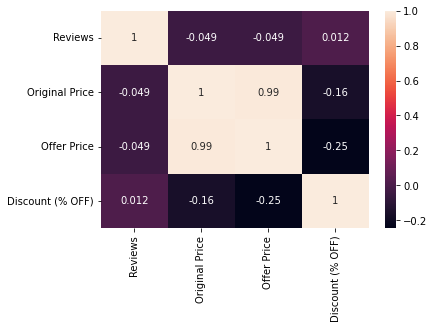

In [23]:
sns.heatmap(df.corr(), annot=True)

# DATA VISUALIZATION

# Factors and Insights:

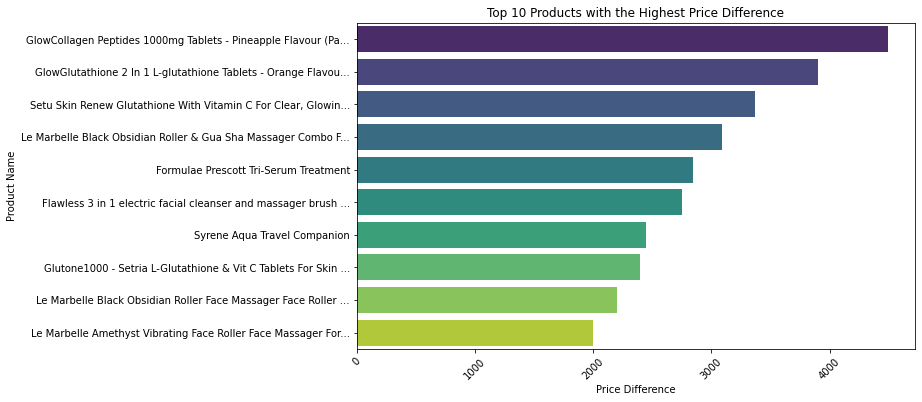

In [27]:
# Plot the price difference analysis using seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x='Price Difference', y='Product Name', data=sorted_df.head(10), palette='viridis')
plt.title('Top 10 Products with the Highest Price Difference')
plt.ylabel('Product Name')
plt.xlabel('Price Difference')
plt.xticks(rotation=45)
plt.show()

# MOST RATED PRODUCT

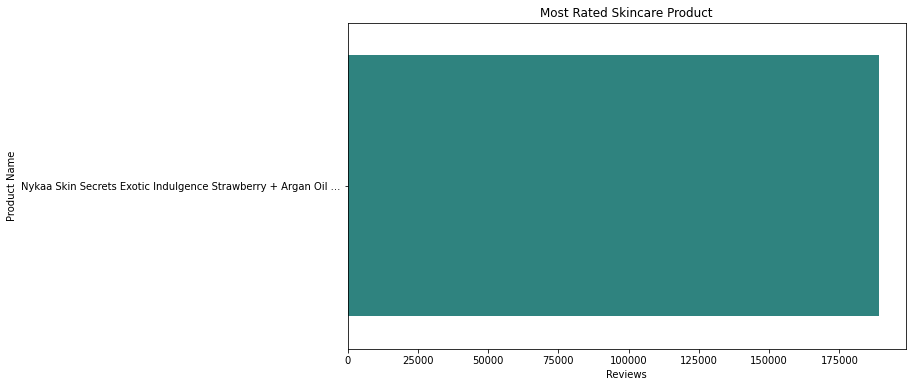

In [28]:
# Sort the DataFrame by Reviews column to get the most rated product
most_rated_product = df.sort_values('Reviews', ascending=False).iloc[0]

# Create a bar plot to visualize the most rated product
plt.figure(figsize=(10, 6))
sns.barplot(x='Reviews', y='Product Name', data=pd.DataFrame([most_rated_product]), palette='viridis')
plt.title('Most Rated Skincare Product')
plt.xlabel('Reviews')
plt.ylabel('Product Name')
plt.show()

# Analyze the distribution of products across different brands ('Brand') to identify popular or prominent brands in the skincare category.

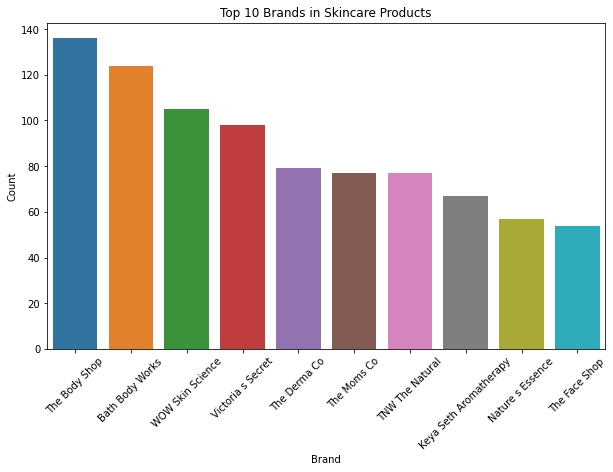

In [29]:
# Perform brand analysis
brand_counts = df['Brand'].value_counts()
top_brands = brand_counts.head(10)  # Select the top 10 brands for visualization

# Plot the brand analysis using seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x=top_brands.index, y=top_brands.values)
plt.title('Top 10 Brands in Skincare Products')
plt.xlabel('Brand')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

# Identify products with the highest discount percentage to understand customer preferences for discounted items

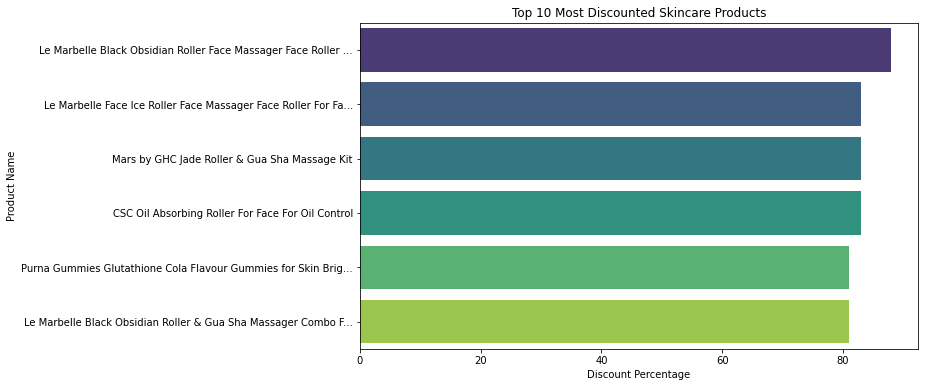

In [30]:
# Sort the DataFrame by Discount Percentage to get the most discounted products
most_discounted_products = df.sort_values('Discount (% OFF)', ascending=False).head(10)

# Plot the most discounted products using seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x='Discount (% OFF)', y='Product Name', data=most_discounted_products, palette='viridis')
plt.title('Top 10 Most Discounted Skincare Products')
plt.xlabel('Discount Percentage')
plt.ylabel('Product Name')
plt.show()

# Determine the most common types of free gifts offered and assess their impact on customer purchasing decisions

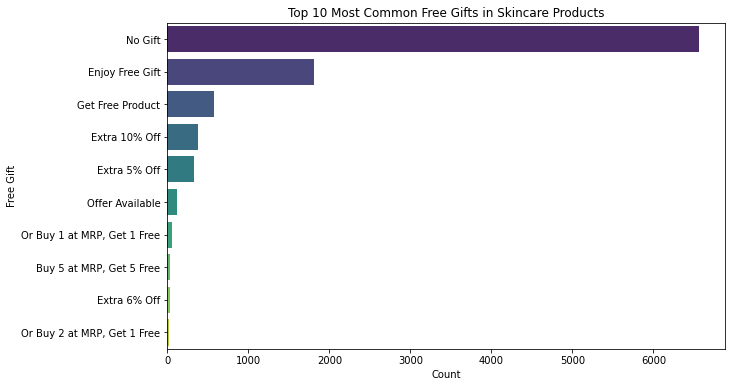

In [31]:
# Extract the unique free gifts and their frequencies
free_gift_counts = df['Free Gifts'].value_counts().reset_index()
free_gift_counts.columns = ['Free Gift', 'Count']

# Sort the free gifts by count in descending order
free_gift_counts.sort_values('Count', ascending=False, inplace=True)

# Plot the free gifts analysis using seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x='Count', y='Free Gift', data=free_gift_counts.head(10), palette='viridis')
plt.title('Top 10 Most Common Free Gifts in Skincare Products')
plt.xlabel('Count')
plt.ylabel('Free Gift')
plt.show()